# importing Libraries and Looking the dataset

In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import re 
from sklearn.metrics import accuracy_score,confusion_matrix
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem.porter import PorterStemmer

In [2]:
sample_training=pd.read_csv("archive (2)/twitter_training.csv")
sample_testing=pd.read_csv("archive (2)/twitter_validation.csv")

In [3]:
print(sample_training.columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [4]:
print(sample_testing.columns)

Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


In [5]:
sample_testing.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [7]:
columns = ['id', 'entity', 'sentiment', 'tweet']
sample_training = pd.read_csv("archive (2)/twitter_training.csv", names = columns)
sample_training

,id,entity,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:
columns = ['id', 'entity', 'sentiment', 'tweet']
sample_testing = pd.read_csv("archive (2)/twitter_validation.csv", names = columns)
sample_testing

,id,entity,sentiment,tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


# Preprocessing The Data

In [10]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
sample_training['sentiment'] = LE.fit_transform(sample_training['sentiment'])

In [15]:
sample_training

,id,entity,sentiment,tweet
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...
1,2401,Borderlands,3,I am coming to the borders and I will kill you...
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...
3,2401,Borderlands,3,im coming on borderlands and i will murder you...
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,3,Just realized that the Windows partition of my...
74678,9200,Nvidia,3,Just realized that my Mac window partition is ...
74679,9200,Nvidia,3,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,3,Just realized between the windows partition of...


In [16]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
sample_testing['sentiment'] = LE.fit_transform(sample_testing['sentiment'])
sample_testing

,id,entity,sentiment,tweet
0,3364,Facebook,0,I mentioned on Facebook that I was struggling ...
1,352,Amazon,2,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,1,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,1,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,2,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),0,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,0,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,3,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,3,Bought a fraction of Microsoft today. Small wins.


In [18]:
sample_training.shape,sample_testing.shape

((74682, 4), (1000, 4))

In [21]:
sample_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  int64 
 3   tweet      73996 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [19]:
sample_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1000 non-null   int64 
 1   entity     1000 non-null   object
 2   sentiment  1000 non-null   int64 
 3   tweet      1000 non-null   object
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


In [26]:
sample_testing.isnull().sum()

id           0
entity       0
sentiment    0
tweet        0
dtype: int64

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/dhruv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
print(stopwords.words('English'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [25]:
sample_training.isnull().sum()

id             0
entity         0
sentiment      0
tweet        686
dtype: int64

In [27]:
sample_training.dropna(inplace = True)

In [28]:
sample_training.isnull().sum()

id           0
entity       0
sentiment    0
tweet        0
dtype: int64

In [29]:
sample_training['sentiment'].value_counts()

sentiment
1    22358
3    20655
2    18108
0    12875
Name: count, dtype: int64

In [30]:
port_stem=PorterStemmer()
def stemming(content):
    stemmed_content=re.sub('[^a-zA-Z]',' ',content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content

In [31]:
sample_training['stemmed_content']=sample_training['tweet'].apply(stemming)

In [32]:
sample_testing['stemmed_content1']=sample_testing['tweet'].apply(stemming)

In [33]:
sample_training.head(5)

,id,entity,sentiment,tweet,stemmed_content
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...,im get borderland murder
1,2401,Borderlands,3,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...,im get borderland kill
3,2401,Borderlands,3,im coming on borderlands and i will murder you...,im come borderland murder
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,im get borderland murder


In [34]:
print(sample_training['stemmed_content'])

0                                 im get borderland murder
1                                         come border kill
2                                   im get borderland kill
3                                im come borderland murder
4                                 im get borderland murder
                               ...                        
74677    realiz window partit mac like year behind nvid...
74678    realiz mac window partit year behind nvidia dr...
74679    realiz window partit mac year behind nvidia dr...
74680    realiz window partit mac like year behind nvid...
74681    like window partit mac like year behind driver...
Name: stemmed_content, Length: 73996, dtype: object


In [35]:
print(sample_testing['stemmed_content1'])

0      mention facebook struggl motiv go run day tran...
1      bbc news amazon boss jeff bezo reject claim co...
2      microsoft pay word function poorli samsungu ch...
3           csgo matchmak full closet hack truli aw game
4      presid slap american face realli commit unlaw ...
                             ...                        
995    toronto art cultur capit canada wonder want st...
996    actual good move tot bring viewer one peopl go...
997    today suck time drink wine n play borderland s...
998            bought fraction microsoft today small win
999    johnson johnson stop sell talc babi powder u c...
Name: stemmed_content1, Length: 1000, dtype: object


In [36]:
print(sample_training['sentiment'])

0        3
1        3
2        3
3        3
4        3
        ..
74677    3
74678    3
74679    3
74680    3
74681    3
Name: sentiment, Length: 73996, dtype: int64


In [85]:
#separating the label and the data
X_train=sample_training['stemmed_content'].values
Y=sample_training['sentiment'].values

In [86]:
X_test=sample_testing['stemmed_content1'].values

In [87]:
print(X_train)

['im get borderland murder' 'come border kill' 'im get borderland kill'
 ... 'realiz window partit mac year behind nvidia driver idea notic'
 'realiz window partit mac like year behind nvidia driver car fuck idea ever notic'
 'like window partit mac like year behind driver idea notic']


In [40]:
print(Y)

[3 3 3 ... 3 3 3]


In [88]:
print(X_train.shape,Y.shape)

(73996,) (73996,)


In [140]:
stemmer = PorterStemmer()
stop_words_set = set(stopwords.words('english'))

In [141]:
def custom_preprocessor(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special characters
    text = text.lower()
    return text

In [142]:
def custom_tokenizer(text):
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words_set]
    return tokens

In [143]:
#convert the text data to numerical data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    preprocessor=custom_preprocessor,
    tokenizer=custom_tokenizer,
    ngram_range=(1, 3),
    max_df=0.8,
    min_df=2,
    max_features=15000,
    sublinear_tf=True
)
x_train=vectorizer.fit_transform(X_train)
x_test=vectorizer.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [144]:
# Split the TF-IDF transformed data into training and test sets
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(
    x_train, Y, test_size=0.2, random_state=42, stratify=Y
)

In [132]:
print(x_train_split.shape,x_test_split.shape,y_train_split.shape,y_test_split.shape)

(59196, 15000) (14800, 15000) (59196,) (14800,)


# Logistic Regression(positive/negative tweets)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [145]:
params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga']
}

In [146]:
model_1= GridSearchCV(LogisticRegression(max_iter=10000), params, cv=5, scoring='accuracy')
model_1.fit(x_train_split,y_train_split)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [147]:
x_tain_prediction=model_1.predict(x_train_split)
trainind_data_acc=accuracy_score(y_train_split,x_tain_prediction)
print("data accuracy on training data : ",trainind_data_acc)

data accuracy on training data :  0.9194033380633827


In [148]:
predictions=model_1.predict(x_test_split)
predictions

array([1, 3, 3, ..., 1, 2, 1])

In [149]:
output_file = 'Logistic_model_prediction_1.csv' 
pd.DataFrame(predictions).to_csv(output_file, index=False, header=False)
print(f"Predictions saved to {output_file}")

Predictions saved to Logistic_model_prediction_1.csv


In [150]:
# Predict on test set
y_test_pred = model_1.predict(x_test_split)
# Calculate accuracy
test_accuracy = accuracy_score(y_test_split, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.8397972972972974


In [151]:
from sklearn.metrics import classification_report
# Generate classification report
print(classification_report(y_test_split,predictions))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      2575
           1       0.87      0.87      0.87      4472
           2       0.84      0.81      0.83      3622
           3       0.80      0.87      0.83      4131

    accuracy                           0.84     14800
   macro avg       0.84      0.83      0.84     14800
weighted avg       0.84      0.84      0.84     14800



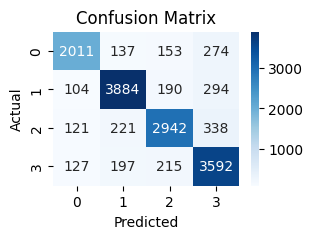

In [152]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test_split,predictions)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  Machine Learning Pipeline (TfidfVectorizer(stop_words='english') and MultinomialNB())

In [153]:
from sklearn.naive_bayes import MultinomialNB

In [163]:
params = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1.0]
}

In [166]:
model_2= GridSearchCV(MultinomialNB(), param_grid=params, cv=5, scoring='accuracy')
model_2.fit(x_train_split,y_train_split)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1.0]},
             scoring='accuracy')

In [167]:
x_tain_prediction=model_2.predict(x_train_split)
trainind_data_acc=accuracy_score(y_train_split,x_tain_prediction)
print("data accuracy on training data : ",trainind_data_acc)

data accuracy on training data :  0.8056456517332252


In [168]:
predictions=model_2.predict(x_test_split)
predictions

array([1, 1, 3, ..., 1, 3, 3])

In [169]:
output_file = 'Multinomial_naiive_bayes_prediction_1.csv' 
pd.DataFrame(predictions).to_csv(output_file, index=False, header=False)
print(f"Predictions saved to {output_file}")

Predictions saved to Multinomial_naiive_bayes_prediction_1.csv


In [170]:
# Predict on test set
y_test_pred = model_2.predict(x_test_split)
# Calculate accuracy
test_accuracy = accuracy_score(y_test_split, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.7618918918918919


In [171]:
from sklearn.metrics import classification_report
# Generate classification report
print(classification_report(y_test_split,predictions))

              precision    recall  f1-score   support

           0       0.83      0.63      0.71      2575
           1       0.74      0.86      0.80      4472
           2       0.79      0.68      0.73      3622
           3       0.74      0.81      0.77      4131

    accuracy                           0.76     14800
   macro avg       0.77      0.74      0.75     14800
weighted avg       0.77      0.76      0.76     14800



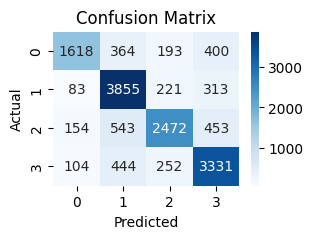

In [172]:
cm = confusion_matrix(y_test_split,predictions)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#  LinearSVC (Support Vector Machine)

In [61]:
from sklearn.svm import LinearSVC

In [173]:
model_3= LinearSVC()
model_3.fit(x_train_split, y_train_split)

LinearSVC()

In [174]:
x_tain_prediction=model_3.predict(x_train_split)
trainind_data_acc=accuracy_score(y_train_split,x_tain_prediction)
print("data accuracy on training data : ",trainind_data_acc)

data accuracy on training data :  0.9057706601797418


In [175]:
predictions=model_3.predict(x_test_split)
predictions

array([1, 3, 3, ..., 1, 2, 1])

In [176]:
output_file = 'SVM_model_prediction_1.csv' 
pd.DataFrame(predictions).to_csv(output_file, index=False, header=False)
print(f"Predictions saved to {output_file}")

Predictions saved to SVM_model_prediction_1.csv


In [177]:
# Predict on test set
y_test_pred = model_3.predict(x_test_split)
# Calculate accuracy
test_accuracy = accuracy_score(y_test_split, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.835


In [178]:
from sklearn.metrics import classification_report
# Generate classification report
print(classification_report(y_test_split,predictions))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      2575
           1       0.87      0.87      0.87      4472
           2       0.84      0.80      0.82      3622
           3       0.79      0.87      0.83      4131

    accuracy                           0.83     14800
   macro avg       0.84      0.83      0.83     14800
weighted avg       0.84      0.83      0.83     14800



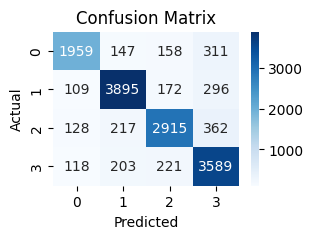

In [179]:
cm = confusion_matrix(y_test_split,predictions)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# RandomForestClassifier 

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
model_4 = RandomForestClassifier(n_estimators=100, random_state=42)
model_4.fit(x_train_split, y_train_split)

RandomForestClassifier(random_state=42)

In [181]:
x_tain_prediction=model_4.predict(x_train_split)
trainind_data_acc=accuracy_score(y_train_split,x_tain_prediction)
print("data accuracy on training data : ",trainind_data_acc)

data accuracy on training data :  0.9681735252381918


In [182]:
predictions=model_4.predict(x_test_split)
predictions

array([1, 3, 3, ..., 1, 2, 3])

In [183]:
output_file = 'Random_Forest_model_prediction_1.csv' 
pd.DataFrame(predictions).to_csv(output_file, index=False, header=False)
print(f"Predictions saved to {output_file}")

Predictions saved to Random_Forest_model_prediction_1.csv


In [184]:
# Predict on test set
y_test_pred = model_4.predict(x_test_split)
# Calculate accuracy
test_accuracy = accuracy_score(y_test_split, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.9029054054054054


In [185]:
from sklearn.metrics import classification_report
# Generate classification report
print(classification_report(y_test_split,predictions))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      2575
           1       0.92      0.92      0.92      4472
           2       0.93      0.88      0.91      3622
           3       0.84      0.94      0.89      4131

    accuracy                           0.90     14800
   macro avg       0.91      0.90      0.90     14800
weighted avg       0.91      0.90      0.90     14800



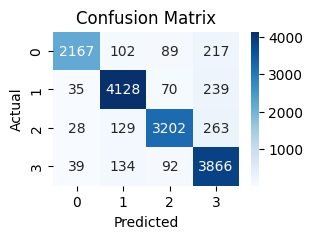

In [186]:
cm = confusion_matrix(y_test_split,predictions)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Xg Boost Classifier

In [187]:
from xgboost import XGBClassifier

In [195]:
model_5 = XGBClassifier()
model_5.fit(x_train_split, y_train_split)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [196]:
x_tain_prediction=model_5.predict(x_train_split)
trainind_data_acc=accuracy_score(y_train_split,x_tain_prediction)
print("data accuracy on training data : ",trainind_data_acc)

data accuracy on training data :  0.7194911818366105


In [197]:
predictions=model_5.predict(x_test_split)
predictions

array([1, 1, 1, ..., 1, 3, 3])

In [198]:
output_file = 'XG_Boast_model_prediction_1.csv' 
pd.DataFrame(predictions).to_csv(output_file, index=False, header=False)
print(f"Predictions saved to {output_file}")

Predictions saved to XG_Boast_model_prediction_1.csv


In [199]:
# Predict on test set
y_test_pred = model_5.predict(x_test_split)
# Calculate accuracy
test_accuracy = accuracy_score(y_test_split, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.6556081081081081


In [200]:
from sklearn.metrics import classification_report
# Generate classification report
print(classification_report(y_test_split,predictions))

              precision    recall  f1-score   support

           0       0.77      0.37      0.50      2575
           1       0.60      0.85      0.70      4472
           2       0.73      0.57      0.64      3622
           3       0.66      0.70      0.68      4131

    accuracy                           0.66     14800
   macro avg       0.69      0.62      0.63     14800
weighted avg       0.68      0.66      0.65     14800



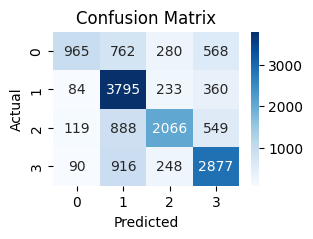

In [201]:
cm = confusion_matrix(y_test_split,predictions)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()